In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

In [14]:
transitions = pd.read_csv("./all_patterns_result.csv", encoding_errors="ignore", on_bad_lines='skip', sep=",",index_col=0)
transitions['f1'] = 2 * (transitions['precision'] * transitions['recall']) / (transitions['precision'] + transitions['recall'])
activities = pd.read_csv("./all_patterns_result_activities.csv", encoding_errors="ignore", on_bad_lines='skip', sep=",",index_col=0)
activities['f1'] = 2 * (activities['precision'] * activities['recall']) / (activities['precision'] + activities['recall'])


In [15]:
# function to create a plot for a specific column, per deviation_rate
# x-axis: amount_injected
# y-axis: column
def plot_column(csv,column, title, col='injected',legend=True):
    # csv = csv[csv['injected'] != 5000]
    fig, ax = plt.subplots()
    for deviation_rate in csv.sessions.unique():
        csv[csv.sessions == deviation_rate].plot(x=col, y=column, ax=ax, label=deviation_rate)
    ax.set_title(title)
    ax.set_xlabel("nr of injected sessions")
    ax.set_ylabel('score')
    if legend:
        ax.legend(loc='best')
    else:
        ax.get_legend().remove()
    plt.show()


In [16]:
# function to create a bar plot for a specific column, per deviation_rate
def plot_column_bar(csv,column, title,col='injected',legend=True):
    # csv = csv[csv['injected'] != 5000]
    fig, ax = plt.subplots()
    for deviation_rate in csv.sessions.unique():
        csv[csv.sessions == deviation_rate].plot.bar(x=col, y=column, ax=ax, label=deviation_rate)
    ax.set_title(title)
    ax.set_xlabel("nr of injected sessions")
    ax.set_ylabel('score')
    if legend:
        ax.legend(loc='best')
    else:
        ax.get_legend().remove()
    # add value on bar chart .02 decimal
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), (p.get_x() * 1.005, p.get_height() * 1.005))
    plt.show()

transitions

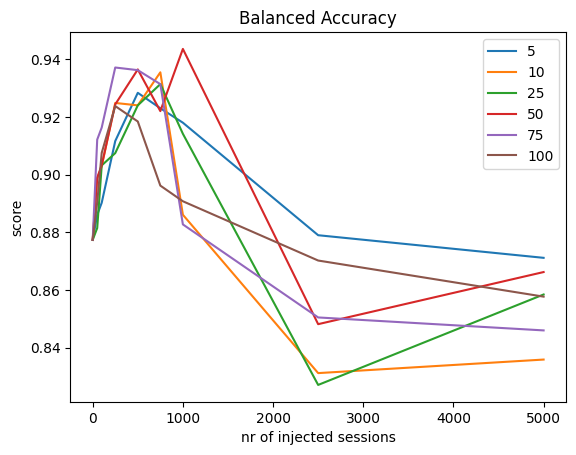

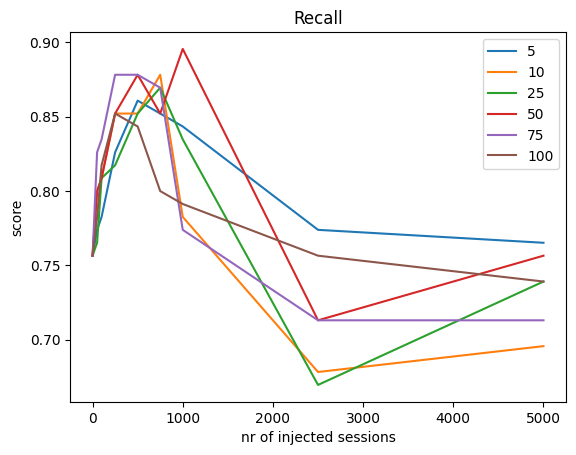

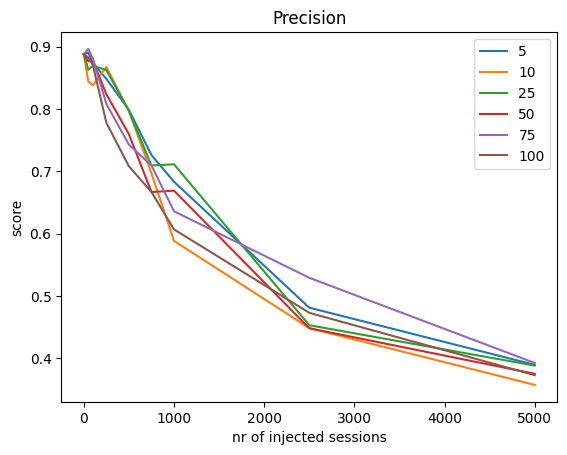

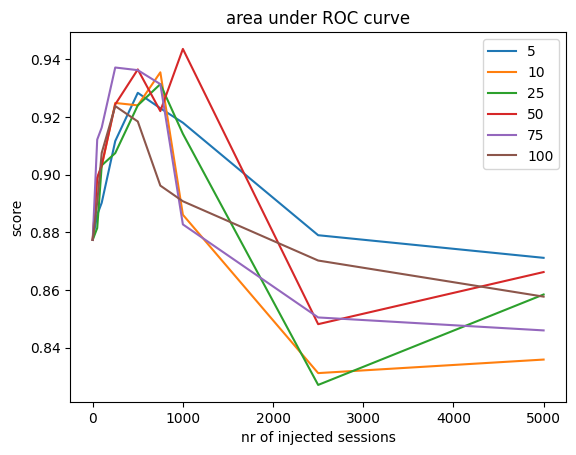

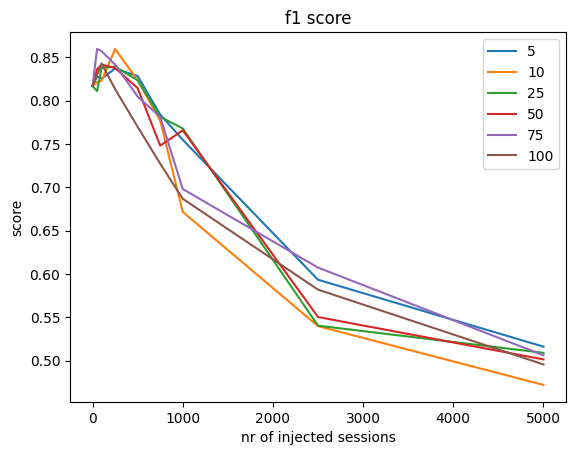

In [17]:
balanced_accuracy = plot_column(transitions,'ball_acc',"Balanced Accuracy")
recall = plot_column(transitions,'recall',"Recall")
precision = plot_column(transitions,'precision',"Precision")
roc = plot_column(transitions,'roc_auc_score','area under ROC curve')
f1 = plot_column(transitions,'f1','f1 score')  

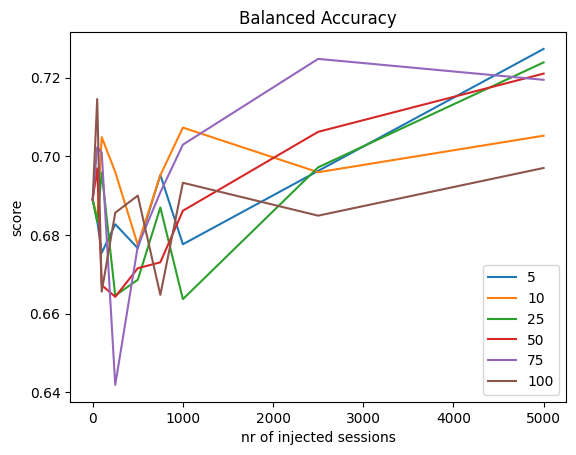

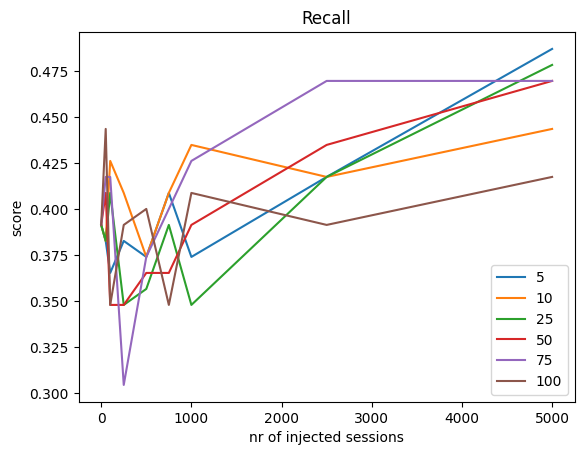

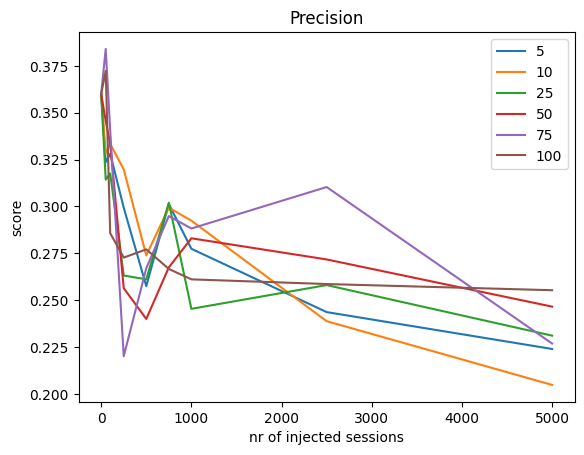

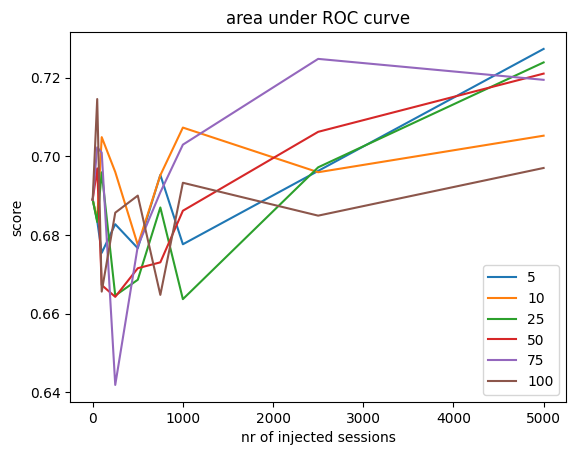

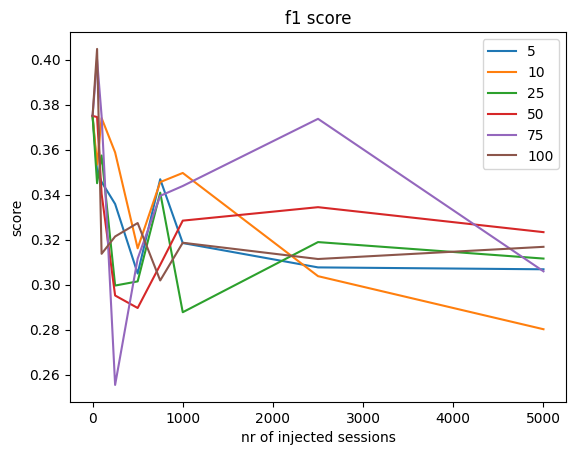

In [18]:
balanced_accuracy = plot_column(activities,'ball_acc',"Balanced Accuracy")
recall = plot_column(activities,'recall',"Recall")
precision = plot_column(activities,'precision',"Precision")
roc = plot_column(activities,'roc_auc_score','area under ROC curve')
f1 = plot_column(activities,'f1','f1 score')  